In [2]:
# Read loss and filtered 
import re
import pandas as pd


loss_columns = ["epoch", "total_loss", "loss_classifier", "loss_box_reg", "loss_objectness", "loss_rpn_box_reg"]
loss_rows = []
with open("runs/fasterrcnn/loss.txt", 'r') as f:
    for line in f:
        if "Validation epoch" in line:
            values = []
            epoch_total_loss, other_losses = line.split("|", 1)

            epoch = int(re.search(r"Validation epoch\s*(\d+):", epoch_total_loss).group(1))
            total_loss = float(re.search(r"total_loss=([-+]?\d*\.\d+|\d+)", epoch_total_loss).group(1))
            values.append(epoch)
            values.append(total_loss)
            # match other losses
            other_loss_values = re.findall(r"([-+]?\d*\.\d+|\d+)", other_losses)
            values.extend([float(x) for x in other_loss_values])
            loss_rows.append(values)

loss = pd.DataFrame(loss_rows, columns=loss_columns)

# write to csv
loss.to_csv("runs/fasterrcnn/training_log.csv", index=False)


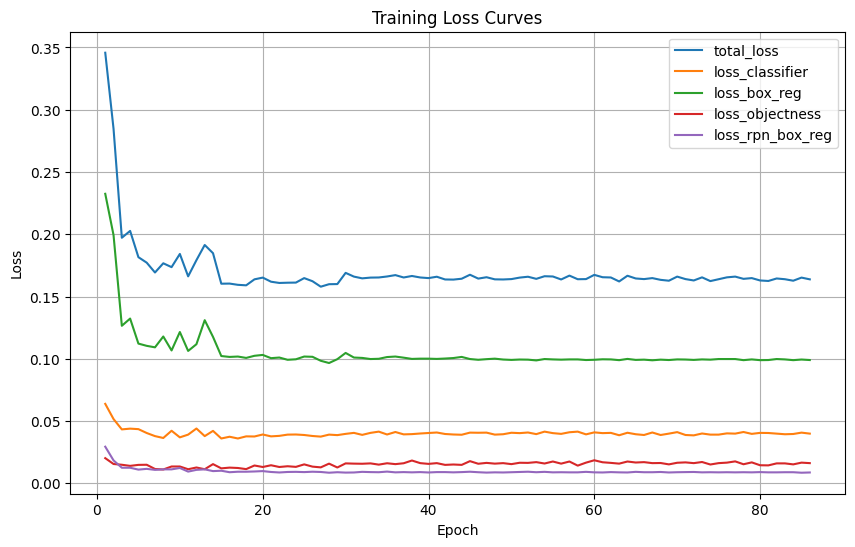

In [ ]:
# draw loss curves
import os
import matplotlib.pyplot as plt

loss_file = "runs/fasterrcnn/training_log.csv"
save_dir = os.path.dirname(loss_file)
# load loss data
loss = pd.read_csv(loss_file)


plt.figure(figsize=(10, 6))
for col in loss_columns[1:]:
    plt.plot(loss['epoch'], loss[col], label=col)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curves')
plt.legend()
plt.grid()
plt.savefig(f"{save_dir}/loss_curves.png")
plt.show()

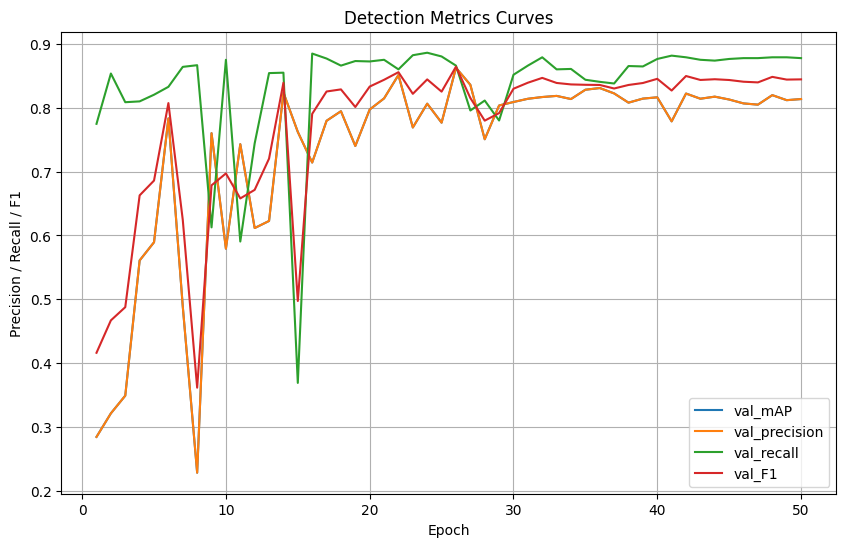

In [9]:
# draw precision, recall F1 curves
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

pr_file = "runs/fasterrcnn_2/detection_metrics.csv"
save_dir = os.path.dirname(pr_file)
# load pr data
pr = pd.read_csv(pr_file)

plt.figure(figsize=(10, 6))
for col in pr.columns[1:]:
    plt.plot(pr['epoch'], pr[col], label=col)
plt.xlabel('Epoch')
plt.ylabel('Precision / Recall / F1')
plt.title('Detection Metrics Curves')
plt.legend()
plt.grid()
plt.savefig(f"{save_dir}/metrics.png")
plt.show()